In [33]:
### Exploratory Data Analysis
### univariate analysis of categorical variables

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [35]:
data=pd.read_csv("C:\\Users\\sony\\A_MACHINE LEARNING AND DEEP LEARNING- INEURON\\Banking Dataset Classification\\Data_Set\\Train_dataset.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


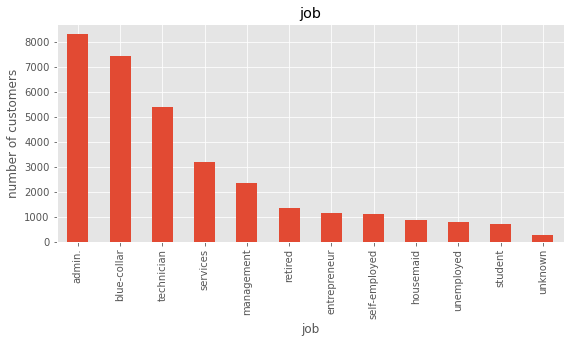

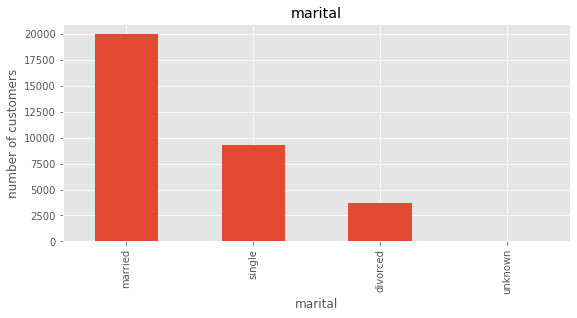

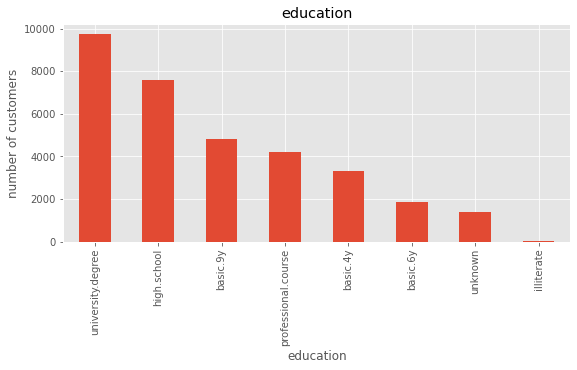

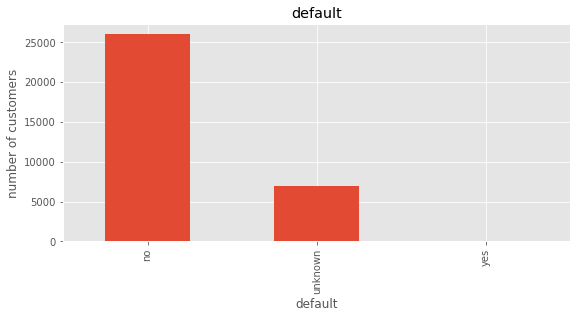

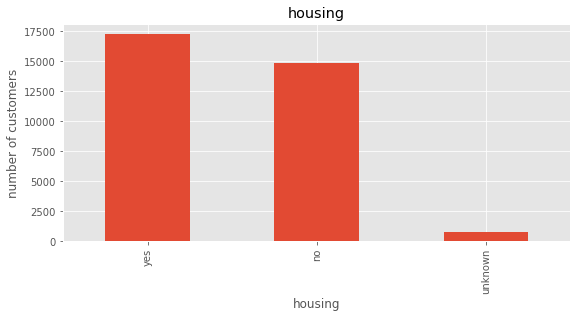

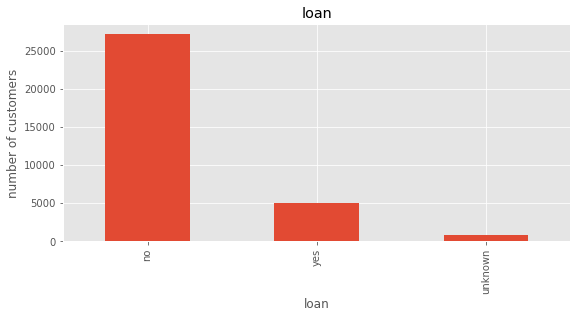

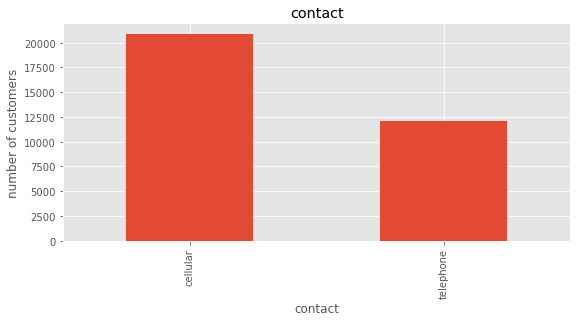

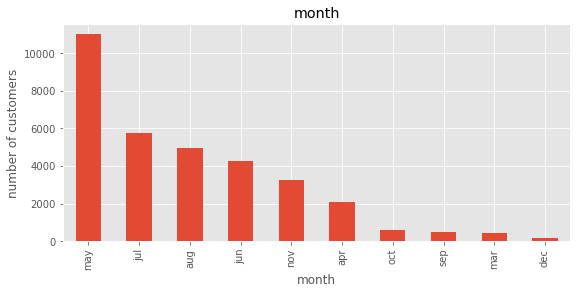

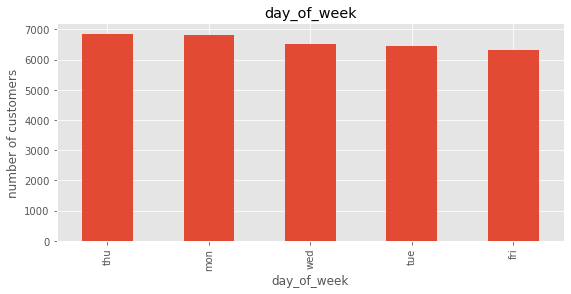

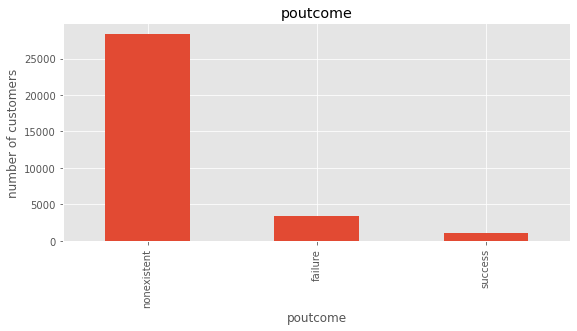

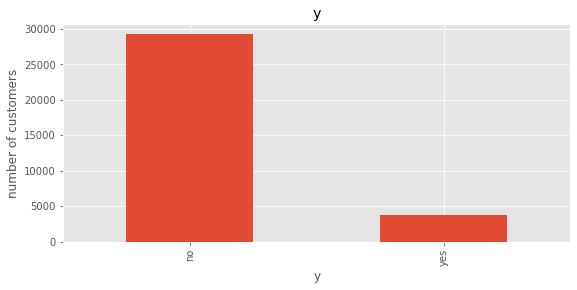

In [36]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [37]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [38]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


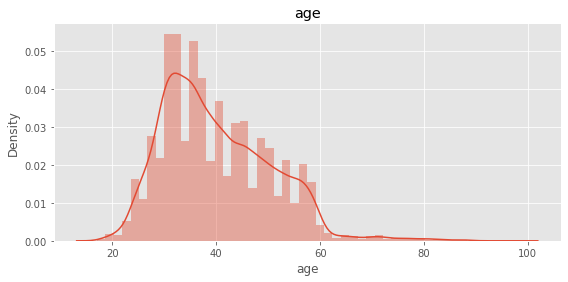

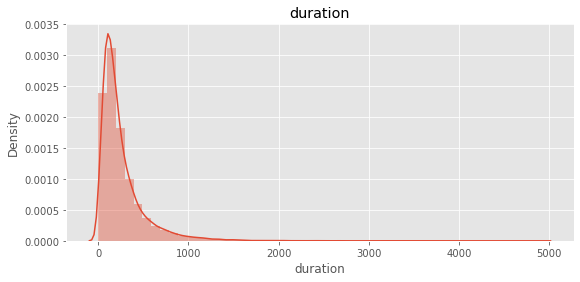

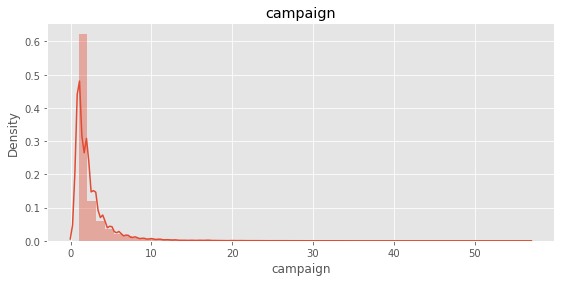

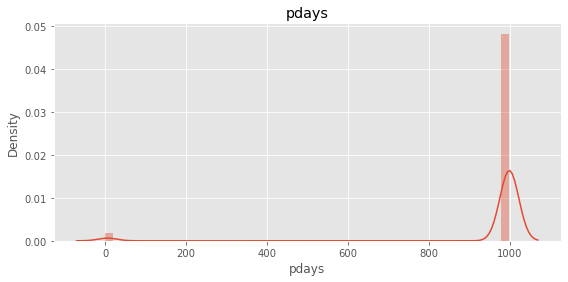

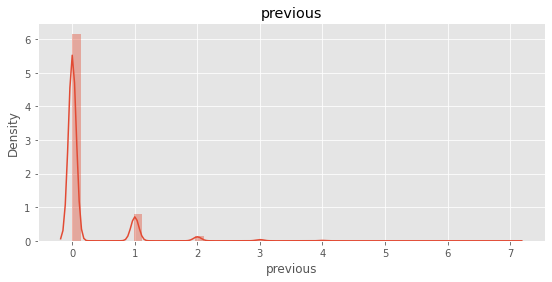

In [39]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
#for column in ["age", "duration", "campaign"]:
for column in num_var.columns:    
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

https://www.kaggle.com/code/rashmiranu/banking-dataset-eda-and-binary-classification

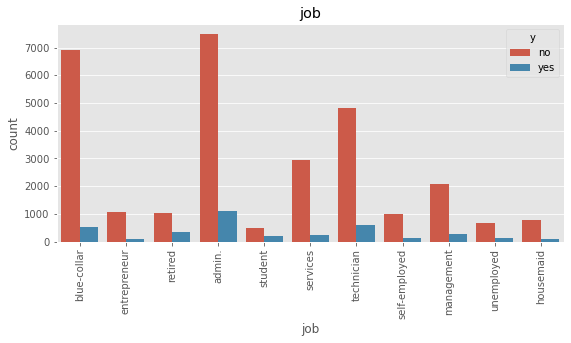

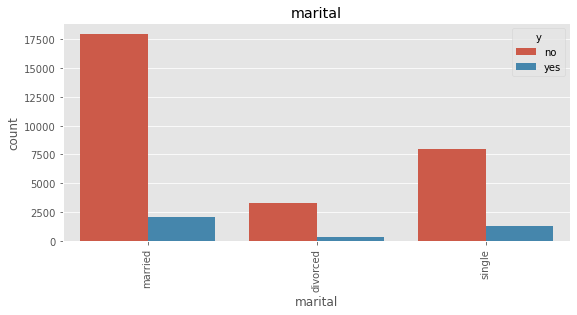

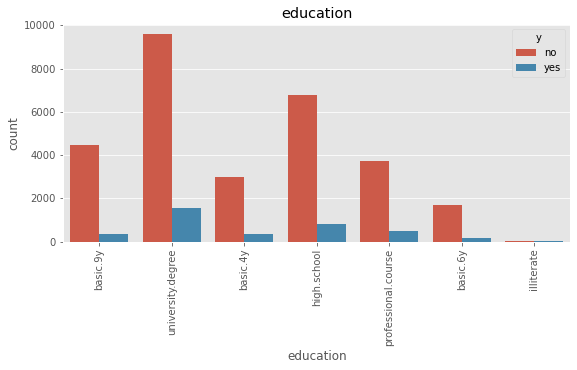

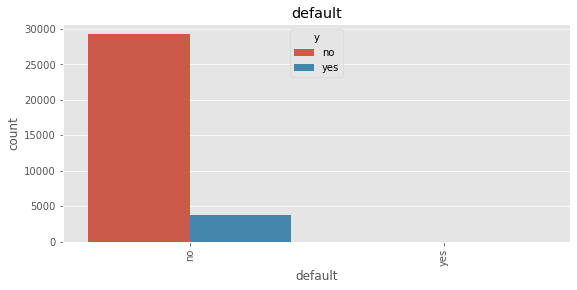

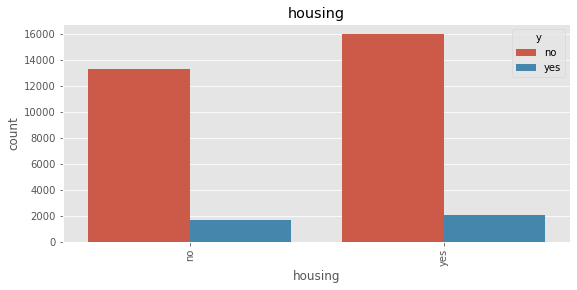

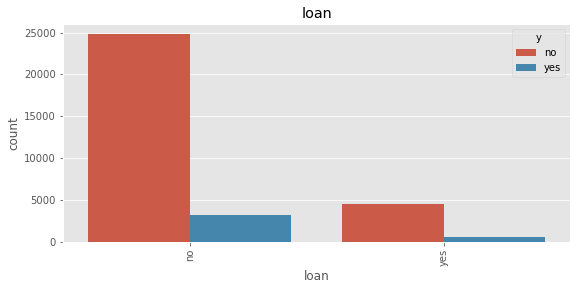

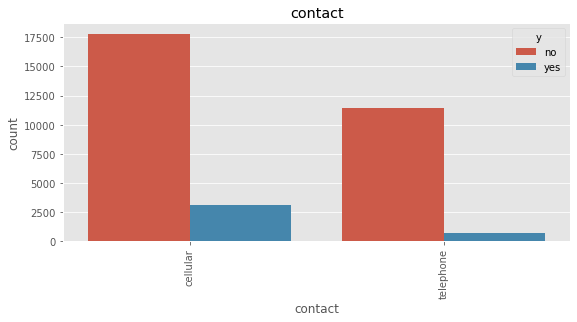

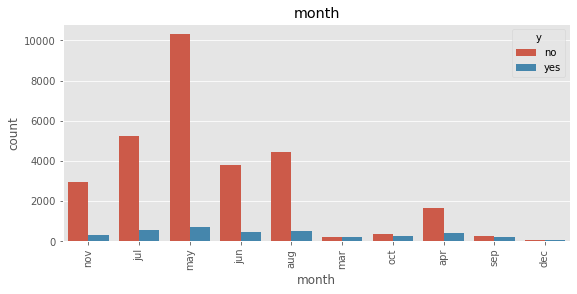

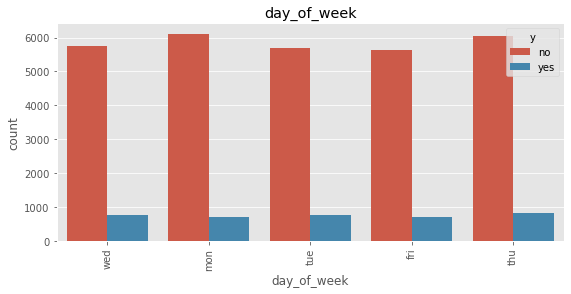

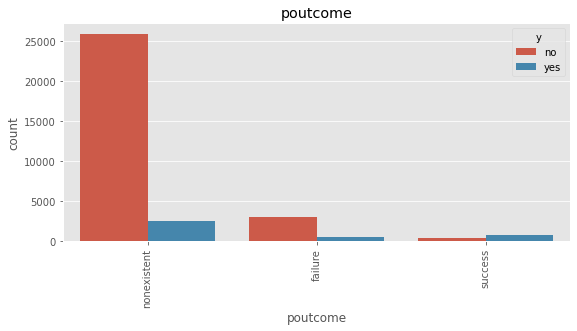

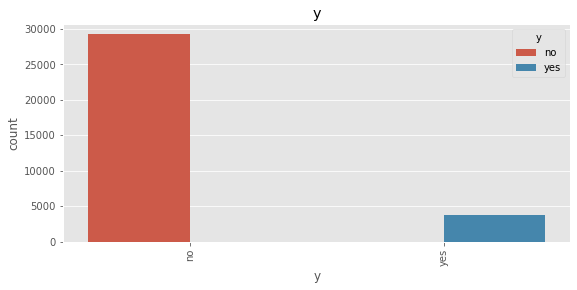

In [40]:
#Bivariate Analysis of Categorical Columns
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data[column], hue=data["y"])
    plt.title(column)    
    plt.xticks(rotation=90)
    

## Observations:
Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit.

They are married

They hold a university degree

They do not hold a credit in default

Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.

Cell-phones should be the preferred mode of contact for contacting customers.

# Handling Outliers :

**Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers.**

**Age duration and campaign are skewed towards right, we will compute the IQR and replace the outliers with the lower and upper boundaries.**

In [41]:
# with outliers
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [42]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "duration", "campaign"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [43]:
lower_boundries

[9.5, -221.0, -2.0]

In [44]:
upper_boundries

[69.5, 643.0, 6.0]

In [45]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "duration", "campaign"]:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1 

## Since,

**for age the lower boundary (9.5) < minimum value (17)**

**for duration and campaigh the lower boundaries are negative (-221.0), (-2.0) resp.
replacing outliers with the lower boundary is not required**

In [46]:
# without outliers
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,39.929894,234.923915,2.271077,962.052413,0.174719
std,10.118566,176.854558,1.546302,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,69.000000,643.000000,6.000000,999.000000,7.000000


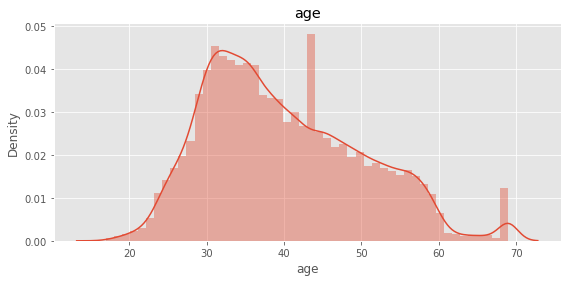

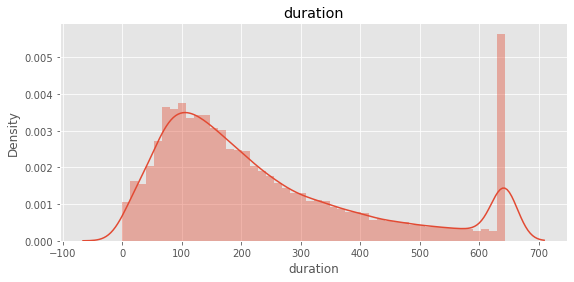

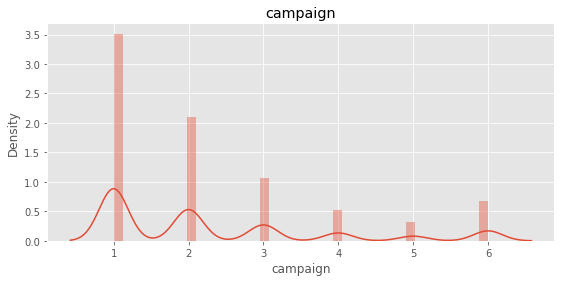

In [47]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
#for column in num_var.columns:    
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

## After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

In [48]:
data.to_csv("C:\\Users\\sony\\A_MACHINE LEARNING AND DEEP LEARNING- INEURON\\Banking Dataset Classification\\Data_Set\\Train_process_dataset.csv")